# Preparing the data and visualize it

In [ ]:
# Labelling the images inside the folders


import os

path = os.chdir("C:\\Users\\User\\Downloads\\Compressed\\Student-engagement-dataset\\frustrated")

counter = 1
for file in os.listdir(path):
  new_file_name = "frustrated " "{}.jpg".format(counter)
  os.rename(file, new_file_name)

  counter += 1

In [ ]:
# Install the Split - folder package

%pip install split-folders

In [ ]:
# Import the package

import splitfolders

splitfolders.ratio("C:\\Users\\User\\Downloads\\Compressed\\Student-engagement-dataset", # The location of dataset
                   output="C:\\Users\\User\\Downloads\\dataset", # The output location
                   seed=42, # The number of seed
                   ratio=(.7, .2, .1), # ration of split is 70%, 20%, 10%
                   group_prefix=None, # If your dataset contains more than one file like ".jpg", ".pdf", etc
                   move=False # I choose not to move, so I turn this into False
                   )

In [ ]:
import seaborn as sns
import pandas as pd
import cv2
import os
import numpy as np

In [ ]:


labels = ['frustrated', 'confused', 'looking away', 'drowsy', 'bored', 'engaged']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
#index of each class

labels = ['frustrated', 'confused', 'looking away', 'drowsy', 'bored', 'engaged']
print(labels.index("frustrated"), 'frustrated')
print(labels.index("confused"), 'confused')
print(labels.index("looking away"), 'looking away')
print(labels.index("drowsy"), 'drowsy')
print(labels.index("bored"), 'bored')
print(labels.index("engaged"), 'engaged')

0 frustrated

1 confused

2 looking away

3 drowsy

4 bored

5 engaged


In [ ]:
# Now we can easily fetch our data.

dataset = get_data("C:\\Users\\User\\Downloads\\Compressed\\Student-engagement-dataset")

C:\Users\User\AppData\Local\Temp\ipykernel_25116\3624338061.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

  return np.array(data)


In [ ]:
# plotting the unbalance dataset

data = []
for i in dataset:
    if(i[1] == 0):
        data.append("frustrated")
    if(i[1] == 1):
        data.append("confused")
    if(i[1] == 2):
        data.append("looking away")
    if(i[1] == 3):
        data.append("drowsy")
    if(i[1] == 4):
        data.append("bored")
    if(i[1] == 5):
        data.append("engaged")
sns.set_style('darkgrid')
# sns.countplot(l)

In [ ]:
# putting l in a dataframe

df_data = pd.DataFrame(data)

<AxesSubplot: xlabel='0'>

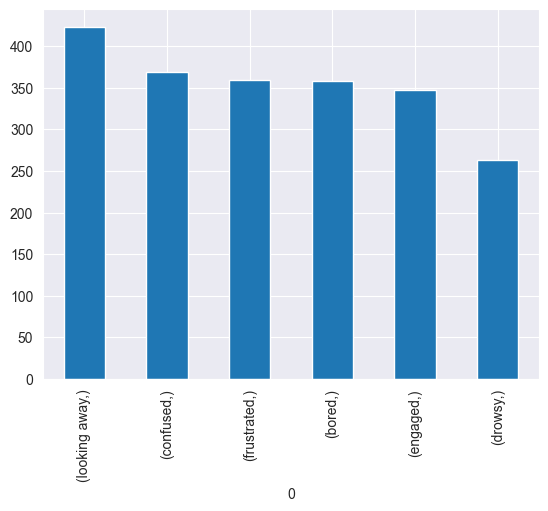

In [ ]:
# Displaying the data inside the dataframe in a plot bar

df_data.value_counts().plot(kind='bar')

# Creating our model

In [1]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = '/kaggle/input/dataset/dataset/train'
test_dir = '/kaggle/input/dataset/dataset/test'
val_dir = '/kaggle/input/dataset/dataset/val'

img_height, img_width = 224, 224 # Set the image dimensions

# Set the batch size for training and validation
batch_size = 32 

# Define the train, validation, and test data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val = val_datagen.flow_from_directory(
        val_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

# Get number of classes
num_classes = len(train.class_indices)

# Print class indices
print(train.class_indices)

# Print number of samples
print('Number of training samples:', train.n)
print('Number of validation samples:', val.n)
print('Number of test samples:', test.n)

Found 1481 images belonging to 6 classes.
Found 421 images belonging to 6 classes.
Found 218 images belonging to 6 classes.
{'bored': 0, 'confused': 1, 'drowsy': 2, 'engaged': 3, 'frustrated': 4, 'looking away': 5}
Number of training samples: 1481
Number of validation samples: 421
Number of test samples: 218


TypeError: unhashable type: 'numpy.ndarray'

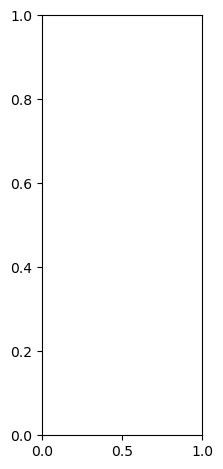

In [2]:
# Let’s take a look at some of the train set images that we obtained from the Data Augmentation
import matplotlib.pyplot as plt #For Visualization
import numpy as np              #For handling arrays
import pandas as pd             # For handling data

plt.figure(figsize=(12, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]        
        dic = {0:'bored', 1:'confused', 2:'drowsy', 3:'engaged', 4:'frustrated', 5:'looking away'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='brg',interpolation='nearest')
        break
plt.tight_layout()
plt.show()

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

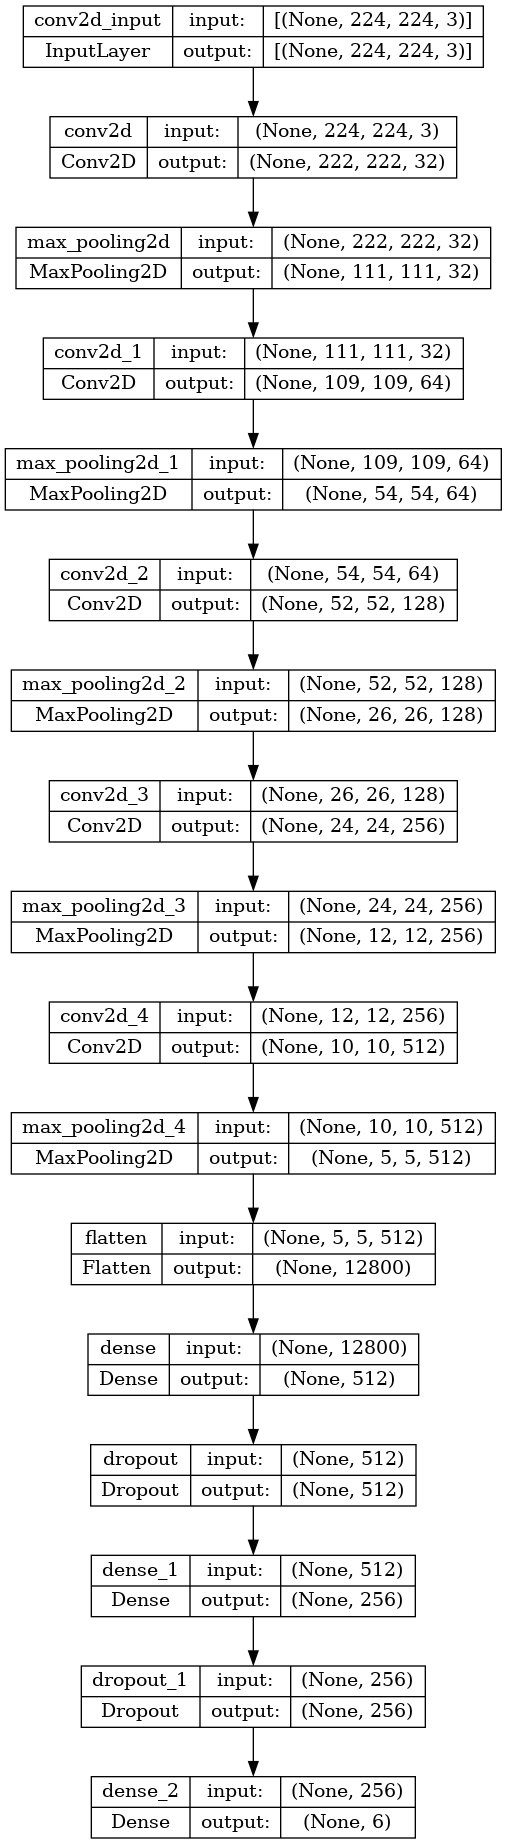

In [5]:
# Visualize CNN model

from keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [6]:
# Defining Callback list

from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define the callbacks
checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001, verbose=1)

callbacks = [checkpoint, early_stop, reduce_lr]

In [9]:
# Assigning Class Weights

from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight


# Calculate class weights
weights = compute_class_weight('balanced', classes=np.unique(train.classes), y=train.classes)

# Convert class weights to a dictionary
cw = dict(zip( np.unique(train.classes), weights))
print(cw)

{0: 0.9873333333333333, 1: 0.9567183462532299, 2: 1.3414855072463767, 3: 1.0199724517906337, 4: 0.9833997343957503, 5: 0.8338963963963963}


In [12]:
# Train the model with class weights amd callbacks
model.fit(train,epochs=25, validation_data=val, class_weight=cw, callbacks=callbacks)

Epoch 1/25
47/47 [==============================] - ETA: 0s - loss: 1.2756 - accuracy: 0.4598
Epoch 1: val_loss improved from inf to 0.43546, saving model to model.h5
47/47 [==============================] - 31s 475ms/step - loss: 1.2756 - accuracy: 0.4598 - val_loss: 0.4355 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 2/25
47/47 [==============================] - ETA: 0s - loss: 0.2985 - accuracy: 0.8845
Epoch 2: val_loss improved from 0.43546 to 0.13023, saving model to model.h5
47/47 [==============================] - 17s 364ms/step - loss: 0.2985 - accuracy: 0.8845 - val_loss: 0.1302 - val_accuracy: 0.9501 - lr: 0.0010
Epoch 3/25
47/47 [==============================] - ETA: 0s - loss: 0.1698 - accuracy: 0.9392
Epoch 3: val_loss improved from 0.13023 to 0.10357, saving model to model.h5
47/47 [==============================] - 18s 379ms/step - loss: 0.1698 - accuracy: 0.9392 - val_loss: 0.1036 - val_accuracy: 0.9477 - lr: 0.0010
Epoch 4/25
47/47 [==============================] - ETA:

<AxesSubplot:>

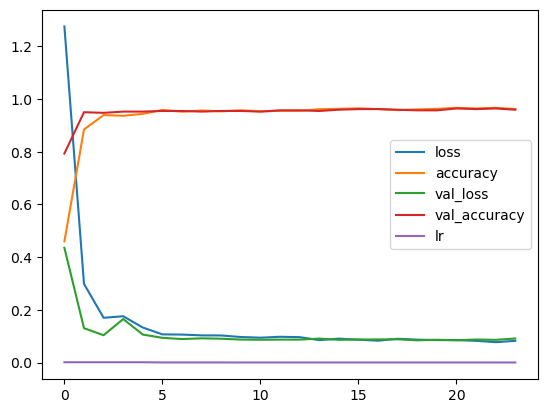

In [13]:
# Evaluate

pd.DataFrame(model.history.history).plot()

In [14]:
# Accuracy on test data

test_accu = model.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

7/7 [==============================] - 3s 415ms/step - loss: 0.1004 - accuracy: 0.9495
The testing accuracy is : 94.95412707328796 %


In [15]:
# Predict the test data

preds = model.predict(test,verbose=1)

7/7 [==============================] - 2s 269ms/step


In [16]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1